In [1]:
import sqlite3

In [2]:
import mysql.connector

In [3]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user='root',
    password='Atharva@779')

In [4]:
mycursor= mydb.cursor()
mycursor.execute('show databases')
for i in mycursor:
    print(i)

('advt',)
('atharvabd',)
('atharvadb',)
('database1',)
('information_schema',)
('mysql',)
('performance_schema',)
('practicedb',)
('sys',)


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [7]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [8]:
column_name = ['STATE', 'DISTRICT', 'Year', 'Rape', 'Kidnapping_and_Abduction',
       'Dowry_Deaths', 'Assault_on_women_with_intent_to_outrage_her_modesty',
       'Insult_to_modesty_of_Women', 'Cruelty_by_Husband_or_his_Relatives',
       'Importation_of_Girls']

In [9]:
df.columns = column_name

In [10]:
df

,STATE,DISTRICT,Year,Rape,Kidnapping_and_Abduction,Dowry_Deaths,Assault_on_women_with_intent_to_outrage_her_modesty,Insult_to_modesty_of_Women,Cruelty_by_Husband_or_his_Relatives,Importation_of_Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [11]:
db = sqlite3.connect('Capstone_project')

In [12]:
cursor = db.cursor()

In [13]:
df.to_sql('crime_against_women',db,if_exists='replace',index=False)

9017

## 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [14]:
sql_query = "DELETE FROM crime_against_women WHERE DISTRICT = 'TOTAL'"
cursor.execute(sql_query)
db.commit()

In [15]:

sql_query = "DELETE FROM crime_against_women WHERE DISTRICT = 'DELHI UT TOTAL'"
cursor.execute(sql_query)
db.commit()

In [16]:
cursor.execute("SELECT STATE, DISTRICT, Year, MAX(Rape) AS max_rape_count, MAX(Kidnapping_and_Abduction) AS max_kidnapping_count FROM crime_against_women GROUP BY STATE, DISTRICT, Year ORDER BY max_rape_count DESC, max_kidnapping_count DESC LIMIT 1")

In [17]:
data = cursor.fetchall()

In [18]:
print(data)

[('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)]


In [19]:
sql_query = "SELECT STATE, DISTRICT, Year, MAX(Rape) as max_rape_count FROM crime_against_women GROUP BY STATE, DISTRICT, Year ORDER BY max_rape_count DESC LIMIT 1 "

In [20]:
cursor.execute(sql_query)

In [21]:
data = cursor.fetchall()
print(data)

[('WEST BENGAL', 'MURSHIDABAD', 2009, 568)]


In [22]:
sql_query = "SELECT STATE, DISTRICT, Year, MAX(Kidnapping_and_Abduction) as max_kidnapping_count FROM crime_against_women GROUP BY STATE, DISTRICT, Year ORDER BY max_kidnapping_count DESC LIMIT 1 "

In [23]:
cursor.execute(sql_query)

In [24]:
data = cursor.fetchall()
print(data)

[('WEST BENGAL', 'MURSHIDABAD', 2011, 492)]


## 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [25]:
sql_query = "SELECT STATE, DISTRICT, Year, MIN(Rape) as MIN_rape_count FROM crime_against_women GROUP BY STATE, DISTRICT, Year ORDER BY MIN_rape_count limit 5"

In [26]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data)

[('A & N ISLANDS', 'CAR', 2012, 0), ('A & N ISLANDS', 'NICOBAR', 2001, 0), ('A & N ISLANDS', 'NICOBAR', 2003, 0), ('A & N ISLANDS', 'NICOBAR', 2004, 0), ('A & N ISLANDS', 'NICOBAR', 2005, 0)]


In [27]:
sql_query = "SELECT STATE, DISTRICT, Year, MIN(Kidnapping_and_Abduction) as MIN_kid_count FROM crime_against_women GROUP BY STATE, DISTRICT, Year ORDER BY MIN_kid_count limit 5"

In [28]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data)

[('A & N ISLANDS', 'NICOBAR', 2001, 0), ('A & N ISLANDS', 'NICOBAR', 2002, 0), ('A & N ISLANDS', 'NICOBAR', 2003, 0), ('A & N ISLANDS', 'NICOBAR', 2004, 0), ('A & N ISLANDS', 'NICOBAR', 2005, 0)]


In [29]:
sql_query = '''SELECT STATE, DISTRICT, Year, MIN(Rape) AS min_rape_count, MIN(Kidnapping_and_Abduction) AS min_kidnapping_count 
FROM crime_against_women 
GROUP BY STATE , DISTRICT, Year
ORDER BY min_rape_count ASC, min_kidnapping_count ASC
'''

In [30]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data)

[('A & N ISLANDS', 'NICOBAR', 2001, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2003, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2004, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2005, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2006, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2008, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2009, 0, 0), ('A & N ISLANDS', 'NICOBAR', 2011, 0, 0), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2004, 0, 0), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2008, 0, 0), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2009, 0, 0), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2011, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2002, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2003, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2004, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2005, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2007, 0, 0), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2009, 0, 0), ('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2003, 0, 

In [31]:


cursor.execute("SELECT name FROM sqlite_schema WHERE type='table'")

tables = cursor.fetchall()

for table in tables:
    print(table[0])


crime_against_women


## 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

## 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

## 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

## 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

## 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [32]:
df = pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [33]:
df

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [34]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [35]:
column_name = ['STATE', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping_Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection_of_Civil_Rights_(PCR)_Act',
       'Prevention_of_atrocities_(POA)_Act', 'Other_Crimes_Against_STs']

In [36]:
df.columns = column_name

In [37]:
df

,STATE,DISTRICT,Year,Murder,Rape,Kidnapping_Abduction,Dacoity,Robbery,Arson,Hurt,Protection_of_Civil_Rights_(PCR)_Act,Prevention_of_atrocities_(POA)_Act,Other_Crimes_Against_STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [38]:
df.to_sql("District_wise_crimes_committed_against_ST",con=db,index=False)

9018

In [39]:
cursor.execute("SELECT name FROM sqlite_schema WHERE type='table'")

tables = cursor.fetchall()

for table in tables:
    print(table[0])

crime_against_women
District_wise_crimes_committed_against_ST


In [40]:
print(tables)

[('crime_against_women',), ('District_wise_crimes_committed_against_ST',)]


## 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [41]:
sql_query = "DELETE FROM District_wise_crimes_committed_against_ST WHERE DISTRICT = 'TOTAL'"
cursor.execute(sql_query)

In [42]:
sql_query = '''SELECT DISTRICT, MAX(Dacoity) AS max_dacoity_count
FROM District_wise_crimes_committed_against_ST
GROUP BY DISTRICT
ORDER BY max_dacoity_count DESC
LIMIT 1'''

In [43]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data)

[('DAHOD', 29)]


In [44]:
sql_query = '''SELECT DISTRICT, MAX(Robbery) AS max_Robbery_count
FROM District_wise_crimes_committed_against_ST
GROUP BY DISTRICT
ORDER BY max_Robbery_count DESC
LIMIT 1'''

In [45]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data)

[('DAHOD', 32)]


In [46]:
for i in data:
    data = i

In [47]:
print('District Name',data[0],'Robbery',data[1])

District Name DAHOD Robbery 32


## 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened.

In [48]:
sql_query = '''SELECT DISTRICT, MIN(Murder) AS max_murder_count
FROM District_wise_crimes_committed_against_ST
GROUP BY DISTRICT
ORDER BY max_murder_count ASC
'''

In [49]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data[:5])

[('24 PARGANAS NORTH', 0), ('24 PARGANAS SOUTH', 0), ('A and N ISLANDS', 0), ('ADILABAD', 0), ('AGRA', 0)]


## 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise

In [50]:
sql_query = '''SELECT DISTRICT,Year, Murder
FROM District_wise_crimes_committed_against_ST
GROUP BY DISTRICT,Year
ORDER BY DISTRICT,Year
'''

In [51]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data[:12])

[('24 PARGANAS NORTH', 2001, 0), ('24 PARGANAS NORTH', 2002, 0), ('24 PARGANAS NORTH', 2003, 0), ('24 PARGANAS NORTH', 2004, 0), ('24 PARGANAS NORTH', 2005, 0), ('24 PARGANAS NORTH', 2006, 0), ('24 PARGANAS NORTH', 2007, 0), ('24 PARGANAS NORTH', 2008, 0), ('24 PARGANAS NORTH', 2009, 0), ('24 PARGANAS NORTH', 2010, 0), ('24 PARGANAS NORTH', 2011, 0), ('24 PARGANAS NORTH', 2012, 0)]


## 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

## 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

## 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

## 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)


In [52]:
df1 = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [53]:
cursor.execute("SELECT name FROM sqlite_schema WHERE type='table'")

tables = cursor.fetchall()

for table in tables:
    print(table[0])

crime_against_women
District_wise_crimes_committed_against_ST


In [55]:
cursor.execute('''CREATE TABLE District_wise_crimes_committed_IPC
                (STATE TEXT,
                 DISTRICT TEXT,
                 YEAR INT,
                 MURDER INT,
                 ATTEMPT_TO_MURDER INT,
                 RAPE INT)''')

with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', 'r') as file:
    # skip the header row
    next(file)
    # iterate over the remaining rows
    for row in file:
        columns = row.strip().split(',')
        state_ut = columns[0]
        district = columns[1]
        year = int(columns[2])
        murder = int(columns[3])
        attempt_to_murder = int(columns[4])
        rape = int(columns[6])
        
        cursor.execute('INSERT INTO District_wise_crimes_committed_IPC VALUES (?, ?, ?, ?, ?, ?)',
                       (state_ut, district, year, murder, attempt_to_murder, rape))

## 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [56]:
sql_query = ''' DELETE FROM District_wise_crimes_committed_IPC WHERE DISTRICT ='TOTAL' '''

In [57]:
cursor.execute(sql_query)

In [58]:
sql_query = ''' DELETE FROM District_wise_crimes_committed_IPC WHERE DISTRICT ='DELHI UT TOTAL' '''

In [59]:
cursor.execute(sql_query)

In [60]:
sql_query = '''SELECT STATE, YEAR, DISTRICT, MAX(MURDER) as MURDERS_COUNT 
FROM District_wise_crimes_committed_IPC
GROUP BY STATE,YEAR,DISTRICT
ORDER BY YEAR,MURDERS_COUNT DESC
'''

In [61]:
cursor.execute(sql_query)
data = cursor.fetchall()
print(data[:12])

[('BIHAR', 2001, 'PATNA', 434), ('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324), ('MAHARASHTRA', 2001, 'MUMBAI', 295), ('UTTAR PRADESH', 2001, 'MEERUT', 275), ('UTTAR PRADESH', 2001, 'BAREILLY', 272), ('UTTAR PRADESH', 2001, 'BULANDSHAHAR', 250), ('JHARKHAND', 2001, 'RANCHI', 243), ('UTTAR PRADESH', 2001, 'ETAH', 240), ('UTTAR PRADESH', 2001, 'BADAUN', 239), ('UTTAR PRADESH', 2001, 'GHAZIABAD', 230), ('UTTAR PRADESH', 2001, 'ALIGARH', 229), ('KARNATAKA', 2001, 'BANGALORE COMMR.', 221)]


## 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [62]:
df = pd.read_sql_query(sql_query,db)
df

,STATE,YEAR,DISTRICT,MURDERS_COUNT
0,BIHAR,2001,PATNA,434
1,UTTAR PRADESH,2001,MUZAFFARNAGAR,324
2,MAHARASHTRA,2001,MUMBAI,295
3,UTTAR PRADESH,2001,MEERUT,275
4,UTTAR PRADESH,2001,BAREILLY,272
...,...,...,...,...
8591,KERALA,2012,RAILWAYS,0
8592,LAKSHADWEEP,2012,LAKSHADWEEP,0
8593,MANIPUR,2012,CID,0
8594,MIZORAM,2012,LUNGLEI,0


In [63]:
district_count = df.groupby('DISTRICT')['YEAR'].nunique()

In [64]:
district_count

DISTRICT
24 PARGANAS NORTH    12
24 PARGANAS SOUTH    12
A and N ISLANDS       1
ADILABAD             12
AGRA                 12
                     ..
WOKHA                12
YADGIRI               3
YAMUNANAGAR          12
YAVATMAL             12
ZUNHEBOTO            12
Name: YEAR, Length: 806, dtype: int64

In [65]:
import numpy as np

In [66]:
index = np.where(district_count >= 3)
index

(array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  53,  54,  55,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  97,  98,  99,
        100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114,
        115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191

In [74]:
df_filterd = df.iloc[index]
df_filterd

,STATE,YEAR,DISTRICT,MURDERS_COUNT
0,BIHAR,2001,PATNA,434
1,UTTAR PRADESH,2001,MUZAFFARNAGAR,324
3,UTTAR PRADESH,2001,MEERUT,275
4,UTTAR PRADESH,2001,BAREILLY,272
5,UTTAR PRADESH,2001,BULANDSHAHAR,250
...,...,...,...,...
801,HARYANA,2002,SONIPAT,82
802,MAHARASHTRA,2002,AHMEDNAGAR,82
803,RAJASTHAN,2002,ALWAR,82
804,GUJARAT,2002,SURAT COMMR.,81


In [75]:
district_count_2 = df_filterd.groupby('DISTRICT')['YEAR'].nunique()

In [76]:
district_count_2

DISTRICT
24 PARGANAS NORTH    2
24 PARGANAS SOUTH    2
ADILABAD             1
AGRA                 2
AHMEDABAD COMMR.     2
                    ..
WEST GODAVARI        1
WOKHA                1
YAMUNANAGAR          1
YAVATMAL             1
ZUNHEBOTO            1
Name: YEAR, Length: 633, dtype: int64

## 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


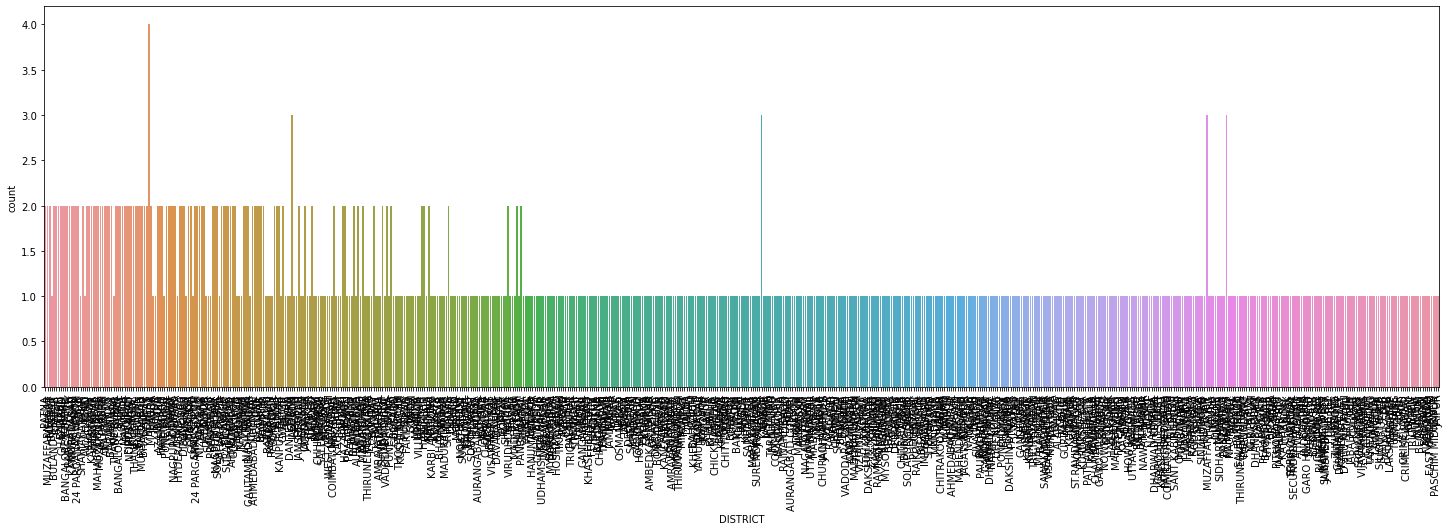

In [78]:
plt.figure(figsize=(25,7))
sns.countplot(df_filterd['DISTRICT'])
plt.xticks(rotation = 90)
plt.show()

In [72]:
district_wise = df.groupby(['STATE','DISTRICT','YEAR'])
district_wise

In [73]:
district_wise.sum()

MURDERS_COUNT
STATE         DISTRICT        YEAR               
A & N ISLANDS A and N ISLANDS 2007             15
              ANDAMAN         2001             13
                              2002             14
                              2003             16
                              2004             13
...                                           ...
WEST BENGAL   UTTAR DINAJPUR  2008             67
                              2009             52
                              2010             63
                              2011             66
                              2012            110

[8596 rows x 1 columns]